# Advertising Sales Channel Prediction

# 1.Data analysis

In [2]:
import pandas as pd 
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


### check the nullvalue

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Inference= there is no null values

### Describing Datasets

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

# 2.EDA

In [8]:
#import libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

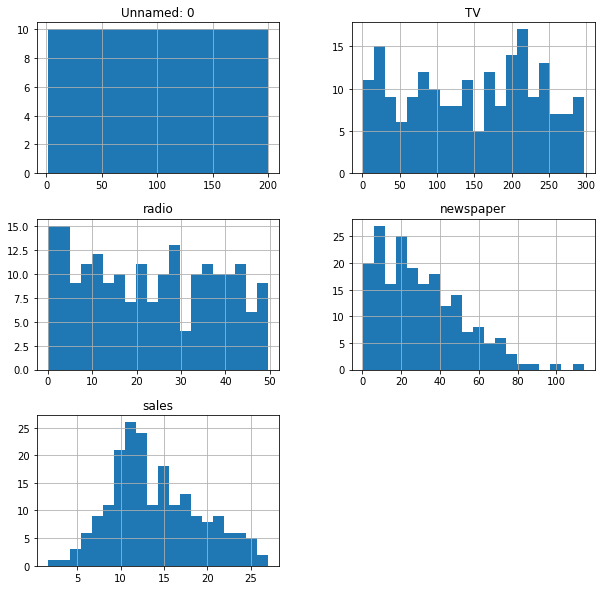

In [9]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

<AxesSubplot:xlabel='sales', ylabel='TV'>

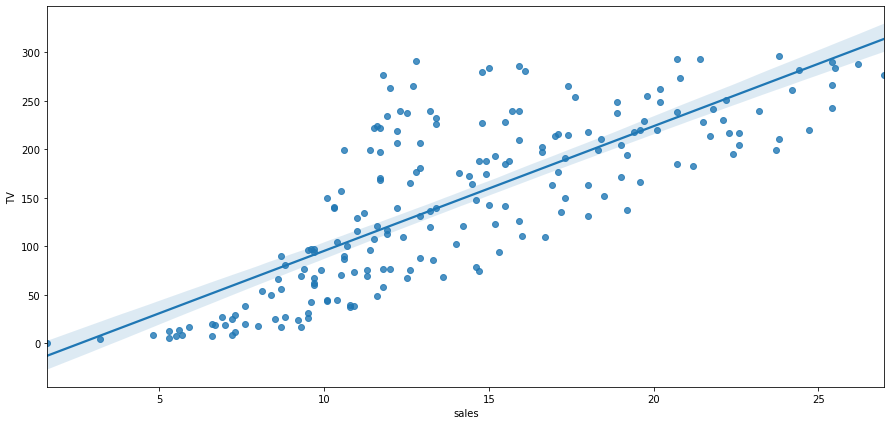

In [10]:
#to check linear relationship between columns
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'sales', y = 'TV', scatter = True)

inference:A scatterplot of TV and sales along with the line of best fit.

<AxesSubplot:xlabel='sales', ylabel='radio'>

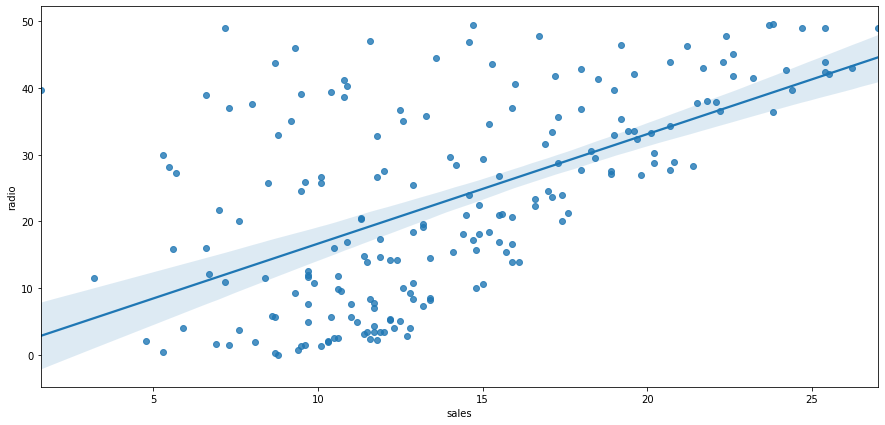

In [11]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'sales', y = 'radio', scatter = True)

Inference:A scatterplot of Radio and sales along with the line of best fit.

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

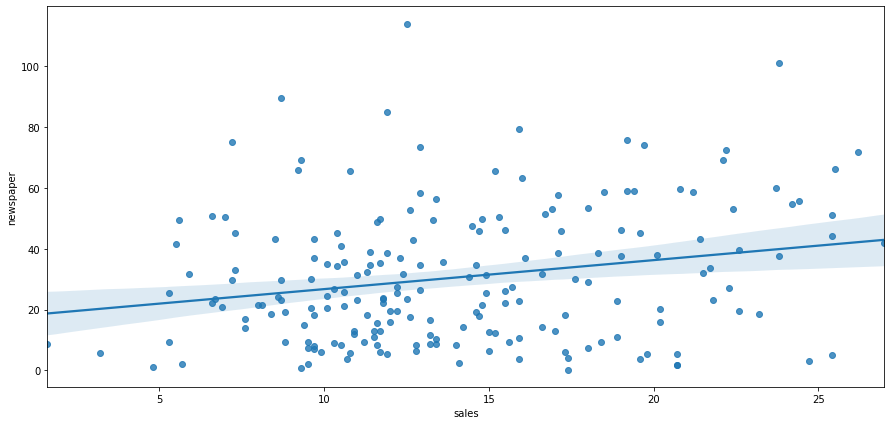

In [12]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'sales', y = 'newspaper', scatter = True)

Inference:A scatterplot of newspaper and sales along with the line of best fit.

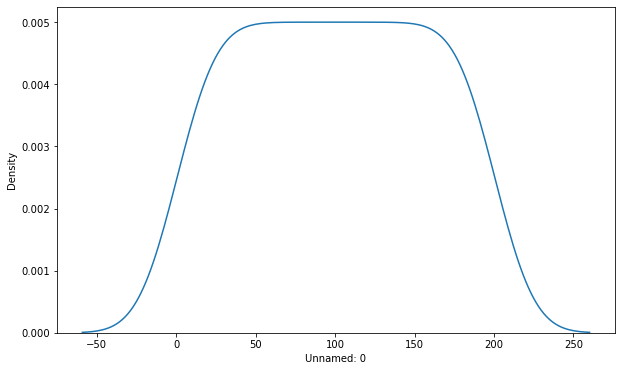

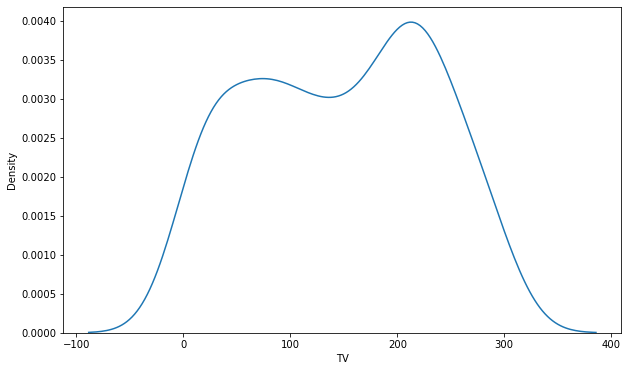

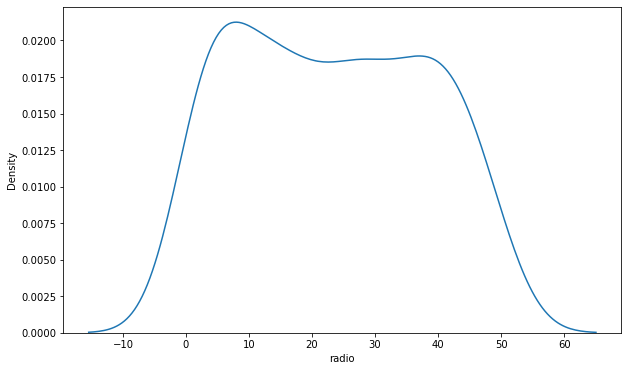

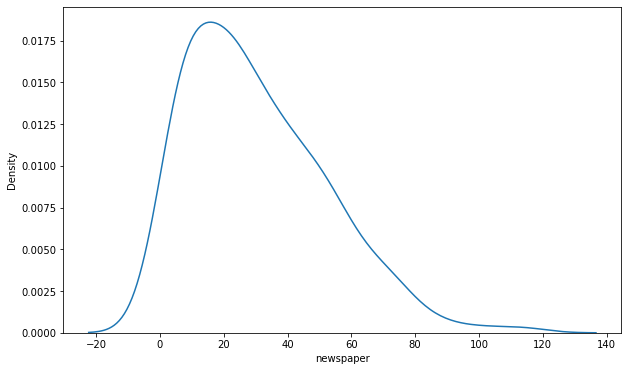

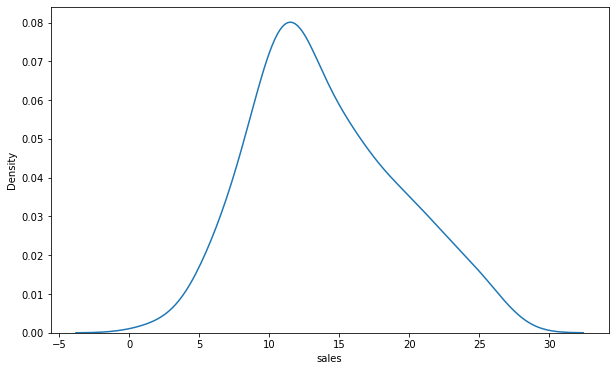

In [13]:
#kde plot to check distribution of data
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

Inference: All the data are normally distributed except Newspaper column.

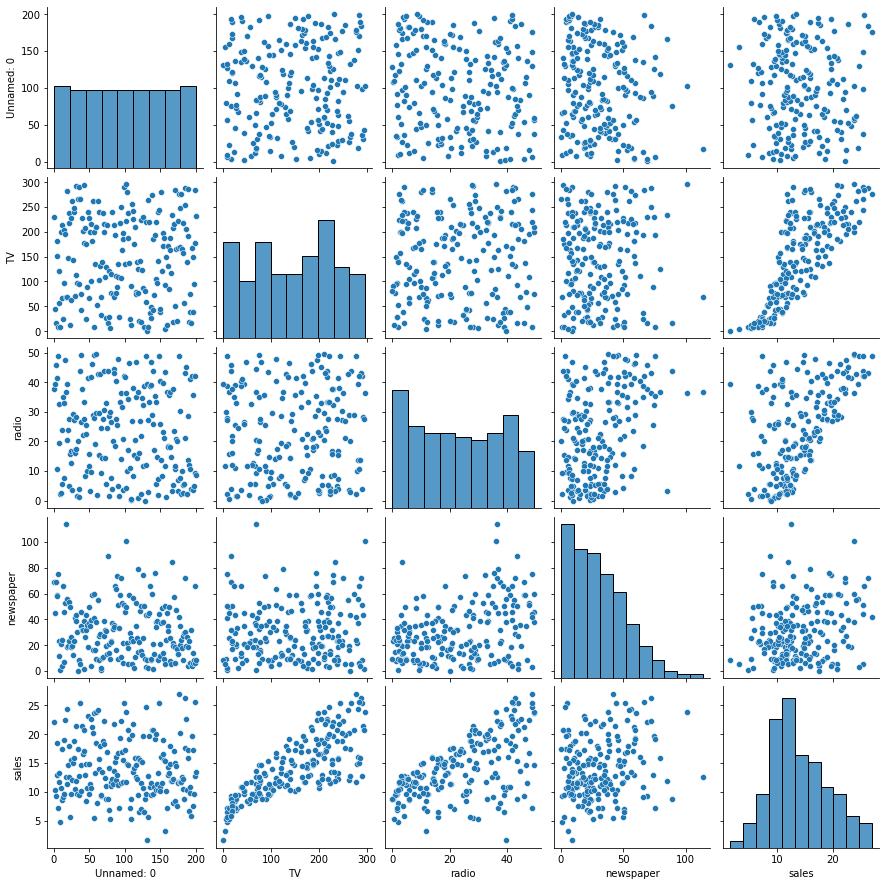

In [14]:
sns.pairplot(df)

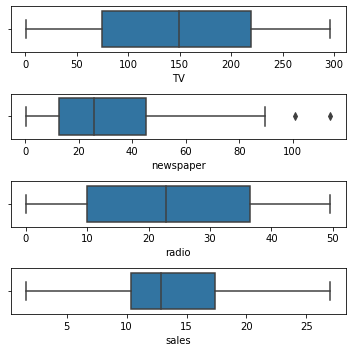

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt4 = sns.boxplot(df['sales'],ax=axs[3])
plt.tight_layout()

Inference:1. newspaper has afew outliers.

          2. Radio,TV,scales haven't outliers.

# 3.correlation

In [16]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

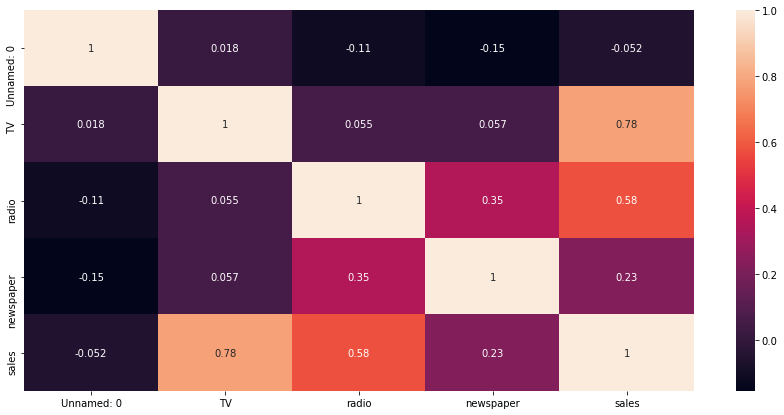

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

Inference: Sales is highly correlated with the TV,Radio.

Where sales is least correlated with newspaper.

TV>Radio>Newspaper


# 4. Skewness

In [18]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [19]:
df['newspaper']=np.sqrt(df['newspaper'])

Inference- Newspaper has skewed

### Transforming data to remove skewness:

In [20]:
#dividing data in feauture and vector
x=df.drop(['sales'],axis=1)
y=df['sales']

In [21]:
from sklearn.preprocessing import power_transform
X=power_transform(x,method='yeo-johnson')

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [23]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.062388
sales         0.407571
dtype: float64

### Normal Distribution Curve

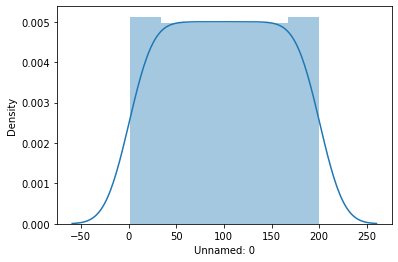

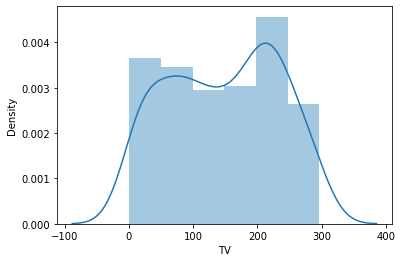

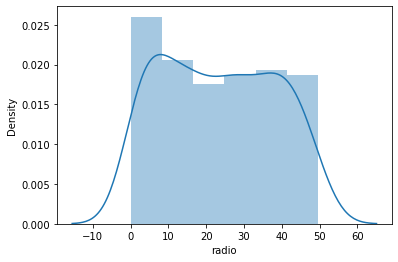

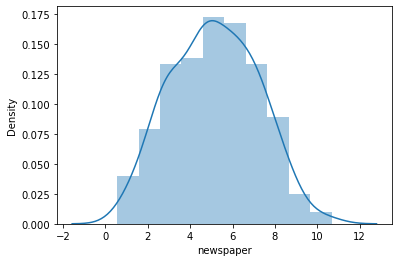

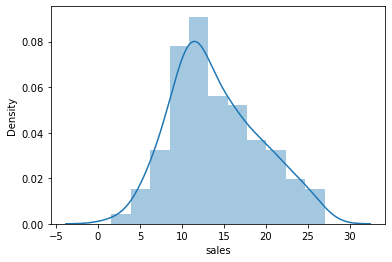

In [24]:
for i, col in enumerate(df):
    plt.figure(i)
    sns.distplot(df[col])

# 5.Removing outliers

Z Score_Technique

In [25]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [27]:
#import libray
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(200, 4)

In [28]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [29]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(200, 4)
(200, 4)


### percentage data loss

In [30]:
loss_percent=(200-198)/200*100
print(loss_percent)

1.0


# 6.Model Construction

## splitting dataframe

In [31]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(40, 4)
(40,)


## 1.LinearRegression

In [34]:
lm=LinearRegression(fit_intercept=True, normalize=True)
lm.fit(x_train,y_train)
print('model coeffient :',lm.coef_)
print('model intercept :',lm.intercept_)
lm.score(x_train,y_train)
pred=lm.predict(x_test)

model coeffient : [-0.00163082  0.04533634  0.18867411  0.02122489]
model intercept : 2.9923108418529285


In [35]:
import numpy as np
from sklearn import metrics
print('error')
#r2 score--> coefficent of determination
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error : 1.162082686076055
mean squared error : 2.132065478846866
root mean squared error : 1.4601594018622988


In [36]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9279956795746788


C-V score

In [37]:
ln_cv=cross_val_score(lm,x,y, cv = 10).mean()
ln_cv

0.882702575683966

Text(0, 0.5, 'Predicted Y')

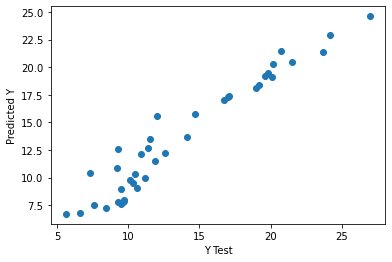

In [38]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 2. RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
predictions1=rf.predict(x_test)

In [41]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.6343000000000013
Mean Squared Error:  0.6300801500000001
Root Mean Squared Error:  0.7937758814678109
Explained Variance Score:  0.9792039540370213
r2_score: 0.9787208725696491


C-V score

In [42]:
rfr_cv=cross_val_score(rf,x,y, cv = 10).mean()
rfr_cv

0.9764023603118055

## 3.GradientBoostingRegressor

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9985928881599575


In [44]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.49749458242003114
Mean Squared Error:  0.39858064692372885
Root Mean Squared Error:  0.6313324377249507
Explained Variance Score:  0.9866818917900635
r2_score: 0.9865390960544278


C-V score

In [45]:

gbr_cv=cross_val_score(GBR,x,y, cv = 10).mean()
gbr_cv

0.9794503051639263

# 7.Hyper Parameter Tuning

## 1.RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
predictions1=rf.predict(x_test)

In [48]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.5910749999999981
Mean Squared Error:  0.5484091749999979
Root Mean Squared Error:  0.7405465380379533
Explained Variance Score:  0.9819055513727407
r2_score: 0.9814790725929098


C-V score

In [49]:
rfr_cv=cross_val_score(rf,x,y, cv = 10).mean()
rfr_cv

0.9766915509842728

## 2.GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [51]:
GBR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']})

In [52]:
GBR.best_params_

{'criterion': 'mae', 'loss': 'ls'}

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(x_train,y_train)
GBR_final=GBR.predict(x_test)

In [54]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  0.5011577887724291
Mean Squared Error:  0.4038242664916002
Root Mean Squared Error:  0.635471688190434
Explained Variance Score:  0.9865331055572417
r2_score: 0.9863620080300217


C-V score

In [55]:
gbr_cv=cross_val_score(GBR,x,y, cv = 10).mean()
gbr_cv

0.9794274353730952

### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS GradientBoostingRegressor

## 7.FINAL MODEL

In [56]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))
print('cv score :',cross_val_score(GBR,x,y, cv = 10).mean())

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  0.49749458242003114
Mean Squared Error:  0.39858064692372885
Root Mean Squared Error:  0.6313324377249507
Explained Variance Score:  0.9866818917900635
r2_score: 0.9865390960544278
cv score : 0.9794108518897738


<AxesSubplot:xlabel='sales', ylabel='Density'>

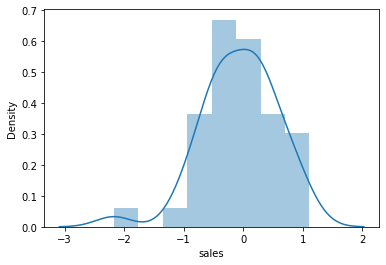

In [57]:
sns.distplot(GBR_PRED-y_test)

Text(0.5, 1.0, 'Linear regression')

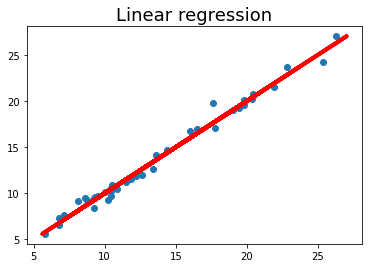

In [58]:
plt.scatter(GBR_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')
plt.title('Linear regression',fontsize=18)

# 8.SAVING THE MODEL

In [59]:
import joblib
joblib.dump(rf,"final model.pkl")
['final model.pkl']

['final model.pkl']